In [1]:
from itertools import count
import pandas as pd
import numpy as np
from collections import Counter
xrxc = pd.read_excel('./input/xiaoerxiaochuan/data.xlsx')
xrxc.rename(columns={'Unnamed: 11': '症状'}, inplace=True)

xrxc = xrxc.loc[:, ['症状', '咳嗽分型']]
xrxc = xrxc.loc[(xrxc['咳嗽分型'] == '寒性哮喘') | (xrxc['咳嗽分型'] == '热性哮喘')]
xrxc.reset_index(drop=True, inplace=True)
xrxc['症状'] = xrxc['症状'].str.replace('咳痰', '痰')
xrxc['症状'] = xrxc['症状'].str.replace('流清涕', '流涕')
xrxc['症状'] = xrxc['症状'].str.replace('多汗', '汗多')
xrxc['症状'] = xrxc['症状'].str.replace('播薄白', '薄白')
xrxc['症状'] = xrxc['症状'].str.replace('舌苔波波', '薄白')
xrxc['症状'] = xrxc['症状'].str.replace('扁桃体大红', '扁桃体肿大')
xrxc['症状'] = xrxc['症状'].str.replace('白痰', '痰')
xrxc['症状'] = xrxc['症状'].str.replace('喘鸣', '哮鸣')
xrxc['症状'] = xrxc['症状'].str.replace('哮鸣音', '哮鸣')
xrxc['症状'] = xrxc['症状'].str.replace('咳', '咳嗽')
xrxc['症状'] = xrxc['症状'].str.replace('咳嗽嗽', '咳嗽')
xrxc['症状'] = xrxc['症状'].str.replace('喘息', '喘')
xrxc['症状'] = xrxc['症状'].str.replace('白痰', '痰')

xrxc.to_csv('./output/xiaoerxiaochuan/小儿哮喘_原始数据.csv',index=False)

counter = Counter([])
for i in xrxc['症状']:
    counter += Counter(i.split('、'))
data = pd.DataFrame(columns=counter.keys())
print(counter)
for i, j in xrxc['症状'].items():
    for k in counter.keys():
        data.loc[i,k] = 0
        for m in j.split('、'):
            if k == m:
                data.loc[i, k] = 1
                break
data = pd.concat([data, xrxc['咳嗽分型']], axis=1)
data['咳嗽分型'] = data['咳嗽分型'].replace('热性哮喘', 0)
data['咳嗽分型'] = data['咳嗽分型'].replace('寒性哮喘', 1)
data['薄'] += data['薄黄']+data['薄白']+data['薄黄腻']+data['薄腻']+data['薄红']+data['薄白腻']
data['白'] += data['薄白']+data['薄白腻']
data['腻'] += data['薄黄腻']+data['薄腻']+data['薄白腻']
data['黄'] += data['薄黄'] + data['薄黄腻']
data['红'] += data['薄红']
data.drop(columns=['薄黄','薄白','薄黄腻','薄腻','薄红','薄白腻'],inplace=True)
data.to_csv('./output/xiaoerxiaochuan/小儿哮喘_预处理.csv',index=False)
data

Counter({'红': 114, '咳嗽': 105, '痰': 69, '汗多': 62, '流涕': 61, '薄黄': 58, '喷嚏': 53, '薄白': 50, '鼻塞': 45, '喘': 39, '欠佳': 35, '扁桃体肿大': 29, '哮鸣': 25, '欠安': 19, '薄黄腻': 19, '粗': 17, '差': 15, '偏干': 15, '口臭': 14, '粗糙': 14, '黄痰': 11, '淡红': 9, '恶心': 8, '稍红': 7, '咽红': 6, '音哑': 6, '汗不多': 5, '呕吐': 5, '不佳': 5, '黄腻': 5, '鼻涕': 4, '少': 4, '发热': 4, '薄腻': 4, '佳': 3, '黄': 3, '打鼾': 3, '暗红': 3, '小便黄': 2, '干': 2, '白': 2, '薄': 2, '痉挛': 1, '不安': 1, '小便偏少': 1, '干鸣音': 1, '肺炎': 1, '头晕': 1, '薄红': 1, '气喘': 1, '深黄': 1, '腻': 1, '薄白腻': 1, '舌苔薄黄': 1, '加': 1})


,咳嗽,痰,欠安,汗不多,欠佳,红,流涕,喷嚏,鼻塞,黄痰,...,气喘,稍红,干,深黄,白,腻,薄,舌苔薄黄,加,咳嗽分型
0,1,1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,1
149,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
150,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,1,0,1,0,0,1
151,1,1,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1


d:\Software\anaconda\envs\test\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
2022-09-04 20:00:32.828 | INFO     | __main__:<cell line: 44>:71 - 使用 LASSO 进行特征选择,剩余(153, 12)个特征


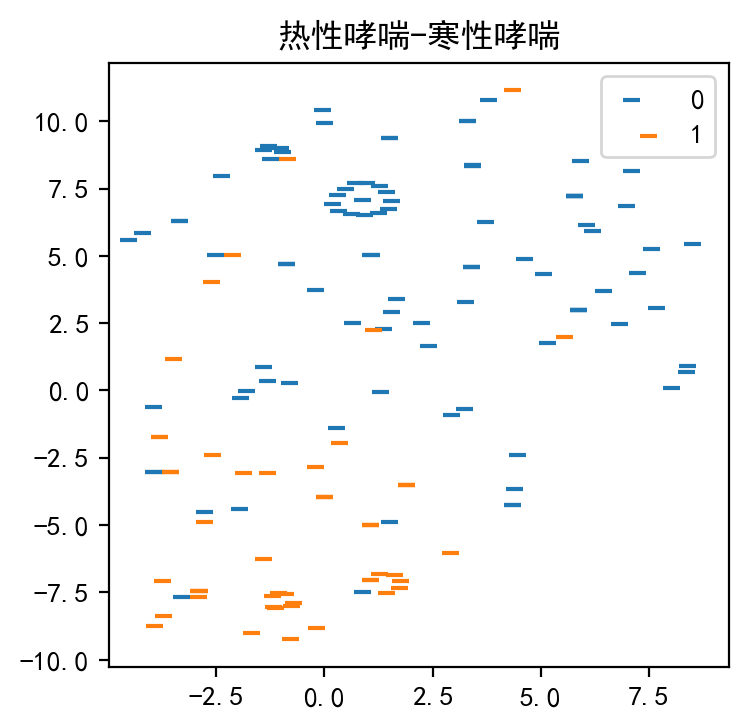

2022-09-04 20:00:33.176 | INFO     | __main__:<cell line: 92>:108 - 使用 SMOTETomek 混合采样
2022-09-04 20:00:33.180 | INFO     | __main__:<cell line: 113>:113 - 采样前：热性哮喘有100条,寒性哮喘有53条
2022-09-04 20:00:33.181 | INFO     | __main__:<cell line: 114>:114 - 采样后：热性哮喘有99条,寒性哮喘有99条
2022-09-04 20:00:38.880 | INFO     | __main__:<cell line: 146>:146 - {'max_depth': 9, 'grow_policy': 'depthwise', 'learning_rate': 0.0004185060210820965, 'gamma': 1.0083703487521015e-05, 'reg_lambda': 0.060289424163382135, 'reg_alpha': 1.15399606561033e-05, 'subsample': 0.7544076758454834, 'colsample_bytree': 0.913440419748003}
2022-09-04 20:00:39.002 | WARNING  | __main__:<cell line: 153>:153 - {'fit_time': array([0.03799987, 0.03399992, 0.03299999]), 'score_time': array([0.00500035, 0.00299978, 0.00499988]), 'test_accuracy': array([0.92424242, 0.89393939, 0.84848485]), 'test_precision': array([0.91176471, 0.86111111, 0.81081081]), 'test_recall': array([0.93939394, 0.93939394, 0.90909091]), 'test_f1': array([0.92537313,

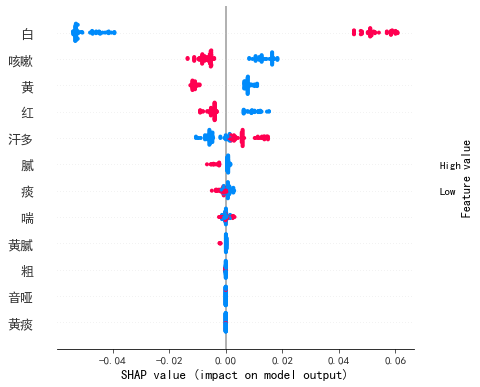

2022-09-04 20:00:39.338 | WARNING  | __main__:<cell line: 154>:167 - 0.894	0.861	0.939	0.899


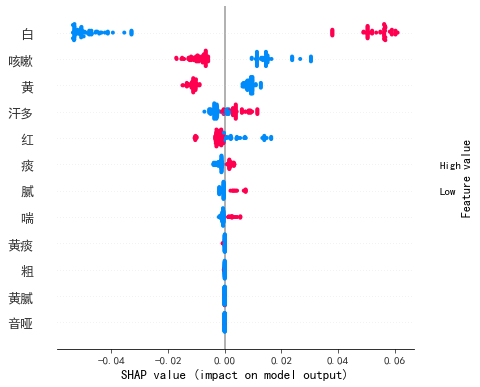

2022-09-04 20:00:39.594 | WARNING  | __main__:<cell line: 154>:167 - 0.848	0.811	0.909	0.857


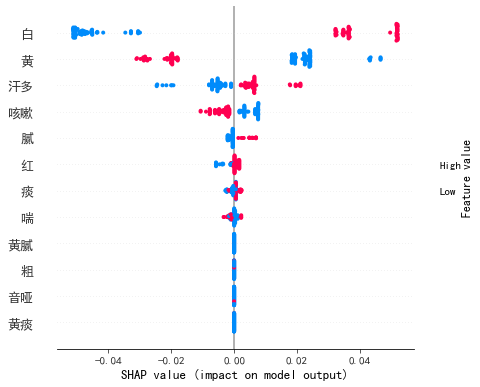

2022-09-04 20:00:39.802 | WARNING  | __main__:<cell line: 173>:173 - accuracy		mean:0.889	std:0.031
2022-09-04 20:00:39.803 | WARNING  | __main__:<cell line: 175>:175 - precision		mean:0.861	std:0.041
2022-09-04 20:00:39.804 | WARNING  | __main__:<cell line: 177>:177 - recall		mean:0.929	std:0.014
2022-09-04 20:00:39.804 | WARNING  | __main__:<cell line: 179>:179 - f1		mean:0.894	std:0.028


In [2]:
# 小儿哮喘 热性哮喘和寒性哮喘
from tkinter import CURRENT
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from loguru import logger
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from utils import readJSON, preprocess
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import shap
from cmath import log
import collections
from collections import Counter
from datetime import datetime
from pprint import pprint
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from imblearn.combine import SMOTETomek
import warnings


warnings.filterwarnings('ignore')

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
id2feature = {0:'热性哮喘',1:'寒性哮喘'}
plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
# sns.set(font='SimHei', font_scale=0.8)  # 解决Seaborn中文显示问题
data = pd.read_csv('./output/xiaoerxiaochuan/小儿哮喘_预处理.csv')
logger.add('./log/小儿哮喘{time}.log')
X = data.drop(columns='咳嗽分型')
y = data['咳嗽分型']
USE_chi2, USE_f_classif, USE_mutual_info_classif, USE_LSVC = False, False, False, True
if USE_chi2:
    logger.info('使用 卡方检验 进行特诊筛选')
    chi2_model = SelectKBest(chi2, k=80)
    X = pd.DataFrame(chi2_model.fit_transform(
        X, y), columns=chi2_model.get_feature_names_out())
elif USE_f_classif:
    logger.info('使用 F检验 进行特征筛选')
    f_classif_model = SelectKBest(f_classif, k=80)
    X = pd.DataFrame(f_classif_model.fit_transform(
        X, y), columns=f_classif_model.get_feature_names_out())
elif USE_mutual_info_classif:
    logger.info('使用 互信息法 进行特征筛选')
    mutual_info_classif_model = SelectKBest(mutual_info_classif, k=80)
    X = pd.DataFrame(mutual_info_classif_model.fit_transform(X, y),
                     columns=mutual_info_classif_model.get_feature_names_out())
elif USE_LSVC:
    from sklearn.svm import LinearSVC
    from sklearn.feature_selection import SelectFromModel
    scaler = StandardScaler()
    X_scale = scaler.fit_transform(X, y)
    X_scale = pd.DataFrame(X, columns=scaler.feature_names_in_)
    lsvc = LinearSVC(C=0.009, penalty='l2', dual=False,
                     random_state=64).fit(X_scale, y)
    model = SelectFromModel(lsvc, prefit=True)
    # X_new = model.transform(X_ce)
    col = [c for c, i in zip(X_scale.columns, model.get_support()) if not i]
    X.drop(columns=col, inplace=True)
    logger.info(f'使用 LASSO 进行特征选择,剩余{X.shape}个特征')
Accuracy = []
Precision = []
Recall = []
F1 = []



#TSNE
tsne = TSNE(n_components=2, init='pca', random_state=64)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(4, 4), dpi=200)
for i in range(0, 2):
    plt.scatter(X_tsne[y == i][:, 0], X_tsne[y == i][:, 1],
                cmap=plt.cm.Set1(i), marker=i, label=str(i))
plt.legend()
plt.title('热性哮喘-寒性哮喘')
plt.show()

# 数据平衡
USE_randomDownSample, USE_Tomek_links, USE_ADASYN, USE_randomOverSample, USE_SMOTE, USE_SMOTETomek = False, False, False, False, False, True
if USE_randomDownSample:
    logger.info('使用 randomDownSample 下采样')
    sampler = RandomUnderSampler(random_state=64)
elif USE_Tomek_links:
    logger.info('使用 TomekLinks 下采样')
    sampler = TomekLinks()
elif USE_ADASYN:
    logger.info('使用 ADASYN 上采样')
    sampler = ADASYN(random_state=64)
elif USE_randomOverSample:
    logger.info('使用 randomOverSample 上采样')
    sampler = RandomOverSampler(random_state=64)
elif USE_SMOTE:
    logger.info('使用 SMOTE 上采样')
    sampler = SMOTE(random_state=64)
elif USE_SMOTETomek:
    logger.info('使用 SMOTETomek 混合采样')
    sampler = SMOTETomek(random_state=64)
else:
    assert False, '没有平衡数据'
X_resampled, y_resampled = sampler.fit_resample(X, y)
logger.info(f'采样前：{id2feature[0]}有{Counter(y)[0]}条,{id2feature[1]}有{Counter(y)[1]}条')
logger.info(f'采样后：{id2feature[0]}有{Counter(y_resampled)[0]}条,{id2feature[1]}有{Counter(y_resampled)[1]}条')


def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(
        X_resampled, y_resampled, test_size=0.1, random_state=64)
    param = {
        'verbosity': 0,
        'eval_metric': 'logloss',
        'objective': 'binary:logistic',
        # 'n_estimators':trial.suggest_int('n_estimators',3500,3600),
        'max_depth': trial.suggest_int("max_depth", 3, 12, step=1),
        'grow_policy': trial.suggest_categorical("grow_policy", ['depthwise', 'lossguide']),
        'learning_rate': trial.suggest_float("learning_rate", 1e-8, 1.0, log=True),
        'tree_method': 'exact',
        # 'booster': 'dart',
        'gamma': trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.2, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 1.0),
        # 'eta': trial.suggest_float("eta", 1e-8, 1.0, log=True),
        'random_state': 42
    }
    model = xgb.XGBClassifier(**param).fit(train_x, train_y)
    preds = model.predict(valid_x)
    return accuracy_score(valid_y, preds)


study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100, timeout=600)
# logger.info(study.best_value)
logger.info(study.best_params)
kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=64)
modelcv = xgb.XGBClassifier(**study.best_params)
# modelcv.save_model(f'./output/model/{datetime.now()}.json')

cv = cross_validate(modelcv, X_resampled, y_resampled, scoring=[
                    'accuracy', 'precision', 'recall', 'f1'], cv=kf)
logger.warning(cv)
for train_index, test_index in kf.split(X_resampled, y_resampled):
    # print(Counter(y_resampled.loc[train_index]),Counter(y_resampled.loc[test_index]))
    model = xgb.XGBClassifier(**study.best_trial.params).fit(
        X_resampled.loc[train_index], y_resampled.loc[train_index])
    preds = model.predict(X_resampled.loc[test_index])
    accuracy = accuracy_score(y_resampled[test_index], preds)
    Accuracy.append(accuracy)
    precision = precision_score(y_resampled[test_index], preds)
    Precision.append(precision)
    recall = recall_score(y_resampled[test_index], preds)
    Recall.append(recall)
    f1 = f1_score(y_resampled[test_index], preds)
    F1.append(f1)
    logger.warning(f'{round(np.mean(accuracy), 3)}\t{round(np.mean(precision), 3)}\t'
                   f'{round(np.mean(recall), 3)}\t{round(np.mean(f1), 3)}')
    explainer = shap.TreeExplainer(model)
    shap_values_XGBoost_train = explainer.shap_values(
        X_resampled.loc[train_index])
    shap.summary_plot(shap_values_XGBoost_train, X_resampled.iloc[train_index])
logger.warning(
    f'accuracy\t\tmean:{round(np.mean(Accuracy), 3)}\tstd:{round(np.std(Accuracy), 3)}')
logger.warning(
    f'precision\t\tmean:{round(np.mean(Precision), 3)}\tstd:{round(np.std(Precision), 3)}')
logger.warning(
    f'recall\t\tmean:{round(np.mean(Recall), 3)}\tstd:{round(np.std(Recall), 3)}')
logger.warning(
    f'f1\t\tmean:{round(np.mean(F1), 3)}\tstd:{round(np.std(F1), 3)}')
